![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [2]:
# 1.
df= pd.read_csv("datasets_beers.csv")
# 2. 
df.head(3)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0


In [3]:
# 3.

df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [4]:
# 4.
df.shape

(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [5]:
#Eliminar columna 
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(2)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [6]:
print("filas", df.shape[0], "columnas", df.shape[1])

filas 2410 columnas 7


## Ejercicio 5
¿De qué tipo son los datos?

In [7]:
df.info()

angeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [8]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [9]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [10]:
df.describe(include='all')

,abv,ibu,id,name,style,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410,2405,2410.000000,2410.000000
unique,NaN,NaN,NaN,2305,99,NaN,NaN
top,NaN,NaN,NaN,Nonstop Hef Hop,American IPA,NaN,NaN
freq,NaN,NaN,NaN,12,424,NaN,NaN
mean,0.059773,42.713167,1431.113278,NaN,NaN,231.749793,13.592241
std,0.013542,25.954066,752.459975,NaN,NaN,157.685604,2.352204
min,0.001000,4.000000,1.000000,NaN,NaN,0.000000,8.400000
25%,0.050000,21.000000,808.250000,NaN,NaN,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,NaN,NaN,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,NaN,NaN,366.000000,16.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [18]:
df['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Flanders Red Ale                    1
Smoked Beer                         1
American Malt Liquor                1
Kristalweizen                       1
Grisette                            1
Name: style, Length: 99, dtype: int64

In [20]:
len(df['style'].value_counts())

99

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [21]:
#con índice a columns y luego filas 
df.loc[10:20, 'name':'ounces']

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [24]:
#Filtrar las propias columnas 
df.iloc[10:21][['abv', 'ibu','ounces']]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [25]:
#Obtener el array 
df.iloc[10:21][['abv', 'ibu','ounces']].values

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [26]:
df['ounces'].describe()

count    2410.000000
mean       13.592241
std         2.352204
min         8.400000
25%        12.000000
50%        12.000000
75%        16.000000
max        32.000000
Name: ounces, dtype: float64

In [27]:
print('total de onzas: ', df['ounces'].sum())

total de onzas:  32757.3


In [30]:
print('Media de peso individual en onzas: ',df['ounces'].mean())

Media de peso individual en onzas:  13.592240663900421


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [31]:
#El round es por estética 

print(round(df['ibu'].mean(),2))
print(df['ibu'].min())
print(df['ibu'].max())

42.71
4.0
138.0


In [37]:
#Filtro de mascara
mask= df['ibu']==df['ibu'].max()
df[mask]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [39]:
#por nombre. Con los dos cocrchetes se filtra 
mask= df['ibu']==df['ibu'].min()
df[mask][['name', 'ibu']]

,name,ibu
106,Summer Solstice,4.0
112,Summer Solstice Cerveza Crema (2009),4.0
117,Summer Solstice (2011),4.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [33]:
#Para calcular la desviacion estandar 
print('varianza', df['ibu'].var())
print('dispersion', df['ibu'].std())
print('media', df['ibu'].mean())

varianza 673.6135373259932
dispersion 25.954065911259324
media 42.71316725978647


## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [41]:
#La correlación da el coeficiente de toas las variabels nnuméricas
df.corr()

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


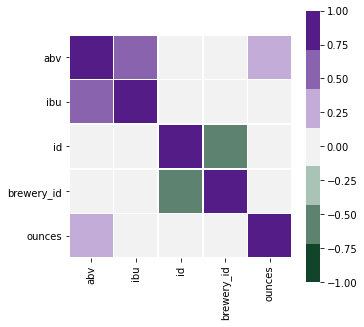

In [34]:
# El heat map 
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5)

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

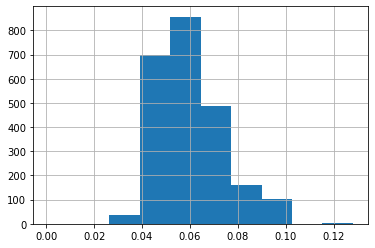

In [35]:
df['abv'].hist()

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

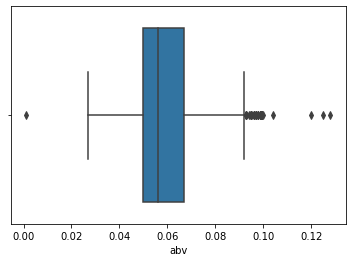

In [36]:
#Con swarmplot pinta lso puntos 
sns.boxplot(x='abv', data=df)
#sns.swarmplot(x='abv', data=df)

#Un diagrama de densidad también sería válido 

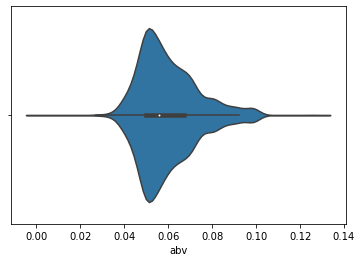

In [37]:
sns.violinplot(x='abv', data=df, aplpha=0.5)

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [38]:
#Al agrupar por style tienen el objeto. luego se filra abv y de esto se csaca la media 
df.groupby('style')['abv'].mean().sort_values(ascending=False).head(10)

style
English Barleywine                  0.107667
Quadrupel (Quad)                    0.104000
American Barleywine                 0.099000
American Malt Liquor                0.099000
Russian Imperial Stout              0.097636
American Double / Imperial Stout    0.093667
American Double / Imperial IPA      0.087369
Tripel                              0.086818
Baltic Porter                       0.085167
Belgian Strong Pale Ale             0.084000
Name: abv, dtype: float64

In [56]:
df.groupby('style')['ibu'].mean().sort_values(ascending=False).head(10)

can Barleywine                   96.000000
American Double / Imperial IPA        93.320000
Russian Imperial Stout                86.500000
American Double / Imperial Pilsner    85.000000
Belgian Strong Dark Ale               72.000000
American Black Ale                    68.900000
American IPA                          67.634551
English Barleywine                    66.666667
English Stout                         66.000000
American Strong Ale                   65.416667
Name: ibu, dtype: float64

In [50]:
#Para copiar nombre de columnas más fácil
df.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [41]:
df2=pd.read_csv("datasets_breweries.csv")
df2.head(3)

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [42]:
df2.columns

Index(['Unnamed: 0', 'name', 'city', 'state'], dtype='object')

In [43]:
df2.rename(columns={'Unnamed: 0':'brewery_id', 'name':'brewery_name'}, inplace=True)
df2.head(3)

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA


## Ejercicio 18
Junta los dos datasets que tienes

In [45]:
df3=df.merge(df2, on='brewery_id')
df3.head(3)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas vervecerías hay?

In [46]:
print(len(df3['state'].unique()))
print(len(df3['city'].unique()))
print(len(df3['brewery_id'].unique()))
print(len(df3['brewery_name'].unique()))

51
384
558
551


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [51]:
ejer_20= df3.groupby(['state', 'city']).aggregate(['mean', 'median', 'max'])['abv']
ejer_20.head(3)

mean  median    max
state city                            
 AK   Anchorage  0.0542   0.052  0.063
      Juneau     0.0530   0.053  0.053
      Soldotna   0.0585   0.058  0.068

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [52]:
bitter = df3[df3['state'] == ' IN']
bitter.sort_values(['ibu'], ascending = False)[['name', 'ibu', 'state']]

,name,ibu,state
479,Hopkick Dropkick,115.0,IN
2191,Overlord Imperial IPA,115.0,IN
811,Half Cycle IPA,104.0,IN
2062,Isis,91.0,IN
2189,Csar,90.0,IN
...,...,...,...
2056,The Deuce,NaN,IN
2061,Chaka,NaN,IN
2190,Klingon Warnog Roggen Dunkel,NaN,IN
2277,Dragonfly IPA,NaN,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [55]:
ejer22= df3.groupby('city')['ibu'].describe()
ejer22.head(10)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albuquerque,4.0,54.250000,38.887659,15.0,26.25,51.0,79.00,100.0
Alpine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anchorage,10.0,40.400000,26.563132,10.0,15.50,42.5,63.25,70.0
Angola,2.0,19.000000,15.556349,8.0,13.50,19.0,24.50,30.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [57]:
mean_tot_ibu = df3['ibu'].mean()
print(mean_tot_ibu)

def filter_func(x):
    return x['ibu'].mean() > mean_tot_ibu

ejer24=df3.groupby('state').filter(filter_func)


42.71316725978647
